In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Read the input image in grayscale
image = cv2.imread('../IMAGES/Malamute.bmp', cv2.IMREAD_GRAYSCALE)
image.shape

(1080, 1616)

In [29]:
# Calculate the histogram
histogram, bins = np.histogram(image.flatten(), 256, [0, 256])

In [30]:
# Compute the CDF
cdf = histogram.cumsum()

In [31]:
# Normalize the CDF
cdf_normalized = cdf * histogram.max() / cdf.max()

In [32]:
# Mask all the 0 values in the CDF
cdf_m = np.ma.masked_equal(cdf, 0)

# Apply histogram equalization formula
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

In [33]:
# Map the original gray levels in the image to the equalized gray levels
equalized_image = cdf[image]




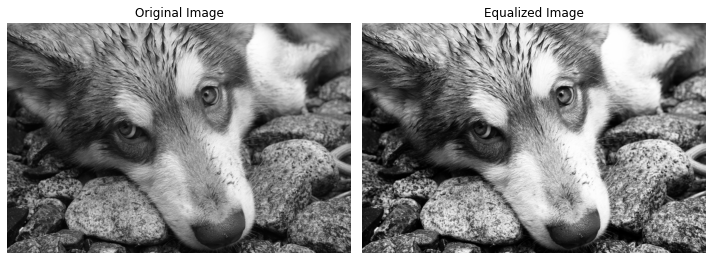

In [34]:
# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()